## CNN(convolutional neural networks)----Image classification

A Convolutional Neural Network (CNN) is a type of deep neural network designed specifically for processing structured 
grid data, such as images and videos.

Classification Task: The task is to build a deep learning model that, given an input image (an instance), 
predicts the class or category of the fashion item depicted in the image.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import tensorflow as tf
from  tensorflow.keras import datasets,models,layers
import tensorflow
import keras
import warnings
warnings.filterwarnings("ignore")

In [2]:
# Fashion MNIST is a dataset of 28x28 grayscale images of 10 fashion categories
(x_train,y_train),(x_test,y_test)=keras.datasets.fashion_mnist.load_data()


In [3]:
x_train.shape, y_train.shape     #60,000 samples in the training set,and each image has a size of 28x28 pixels.

((60000, 28, 28), (60000,))

In [4]:
x_test.shape, y_test.shape

((10000, 28, 28), (10000,))

In [5]:
x_train           #array structure corresponds to the pixel values of an image.
#The array consists of multiple rows and columns of pixel values, forming a 2D representation of an image

array([[[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]],

       [[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]],

       [[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]],

       ...,

       [[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]],

       [[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 

In [6]:
x_train[0]
#used to access the first element of the array, which, in this case, corresponds to the first training image.
#Each number in the array represents the intensity of a pixel in the image, with 0 being the lowest intensity (black)
#and 255 being the highest intensity (white).

array([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   1,
          0,   0,  13,  73,   0,   0,   1,   4,   0,   0,   0,   0,   1,
          1,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   3,
          0,  36, 136, 127,  62,  54,   0,   0,   0,   1,   3,   4,   0,
          0,   3],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   6,
          0, 102, 204, 176, 134, 144, 123,  23,   0,   0,   0,   0,  12,
         10,   0],
       [  

The y_train array might look like [9, 0, 0, 3, 0, ...]. This means the first image in x_train belongs to category 9, the second image belongs to category 0, the third image belongs to category 0, and so on.

In [7]:
y_train
# the output array represents the labels or categories associated with each training image.
# each label is an integer between 0 and 9, representing different clothing categories

array([9, 0, 0, ..., 3, 0, 5], dtype=uint8)

In [8]:
y_train[0]

9

In [9]:
class_labels=['T-shirt/Top','Trouser','Pollover','Dress','coat','Sandel','shirt','Sneakers','Bag','Ankle Boot']

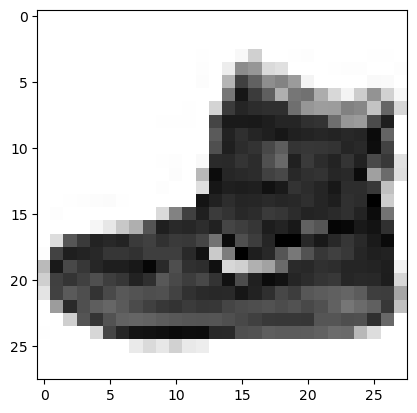

In [10]:
plt.imshow(x_train[0], cmap='Greys')  
#Display the first training image in grayscale

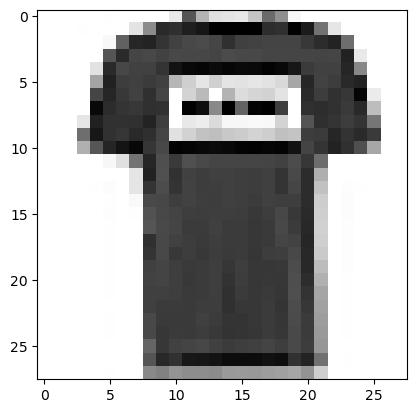

In [11]:
plt.imshow(x_train[1], cmap='Greys')  

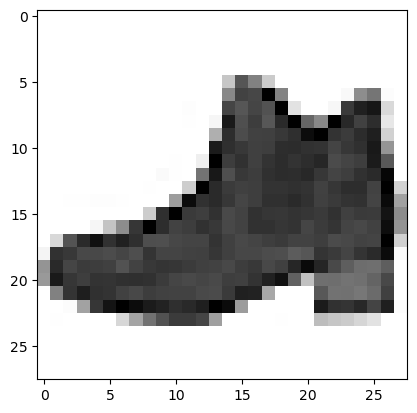

In [12]:
plt.imshow(x_train[15], cmap='Greys') 

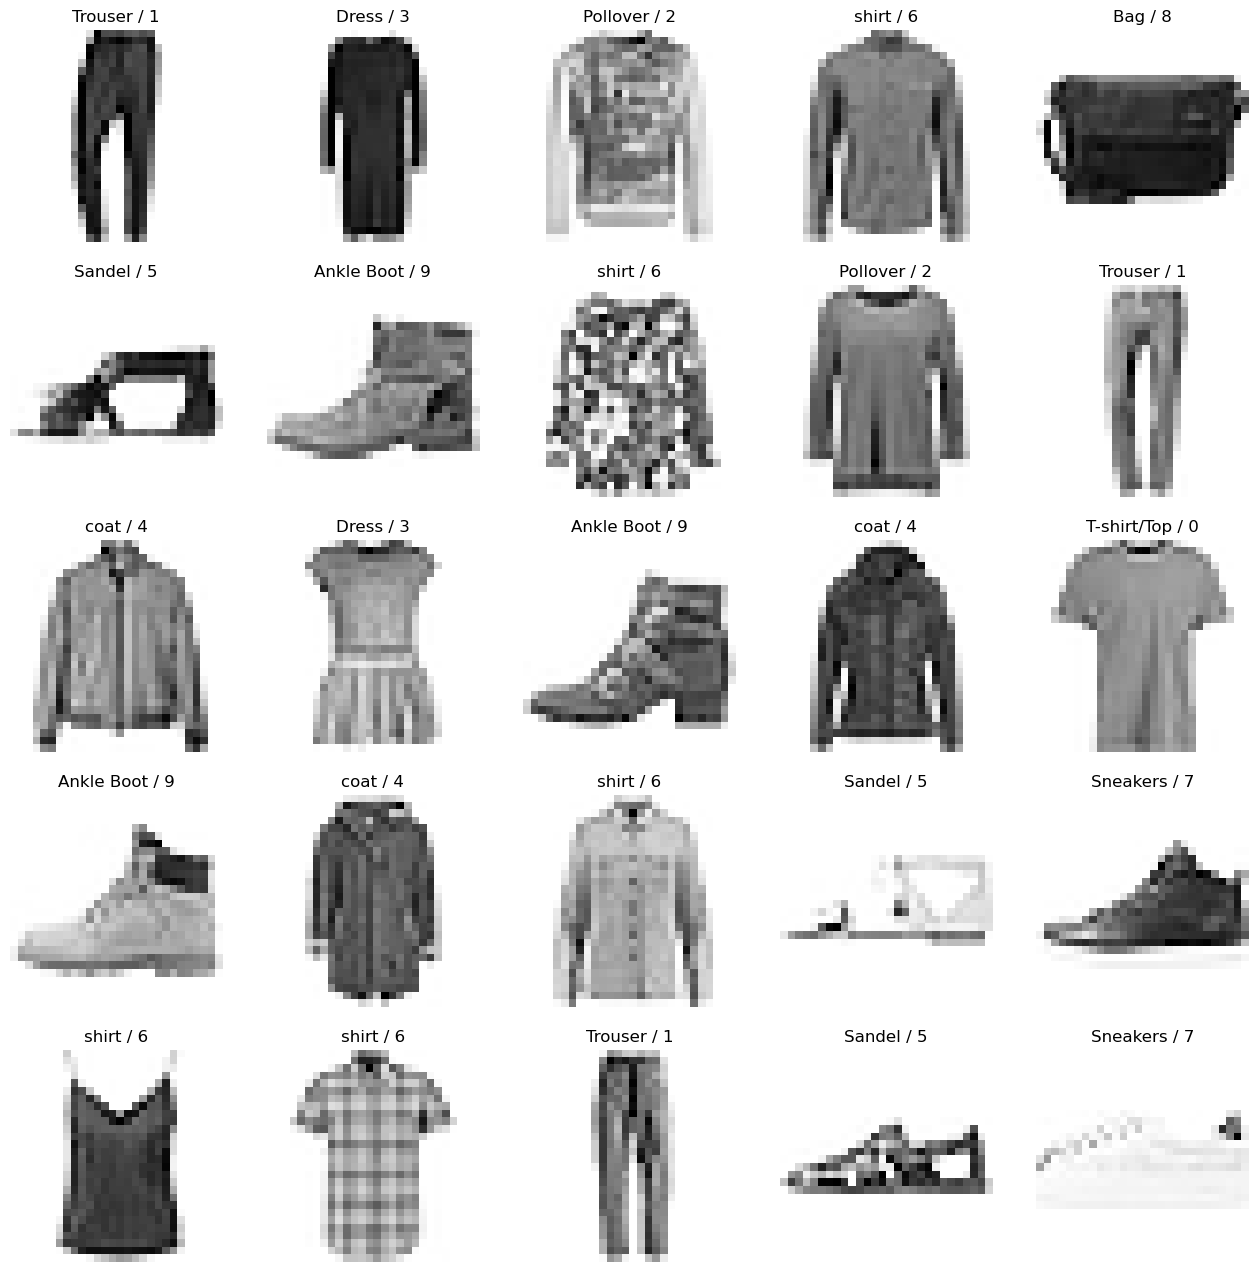

In [13]:
plt.figure(figsize=(16,16))
j = 1                                        #initializes a variable j to keep track of the subplot index.

for i in np.random.randint(0, 1000, 25):
    plt.subplot(5, 5, j);  j+=1               # creates subplots in a 5x5 grid
    plt.imshow(x_train[i], cmap='Greys')  
    plt.axis('off')  #off the axis labels and ticks for the current subplot, creating a cleaner appearance without axis annotations.
    plt.title('{} / {}'.format(class_labels[y_train[i]], y_train[i]))  
#it sets the title for the current subplot(based on e the actual class label (class_labels[y_train[i]]) and the corresponding numeric label (y_train[i]))

plt.show()

[9 0 3 2 7 5 1 6 4 8]
[0, 1, 3, 5, 6, 8, 16, 18, 19, 23]
(28, 28, 1)
(28, 28, 1)
(28, 28, 1)
(28, 28, 1)
(28, 28, 1)
(28, 28, 1)
(28, 28, 1)
(28, 28, 1)
(28, 28, 1)
(28, 28, 1)


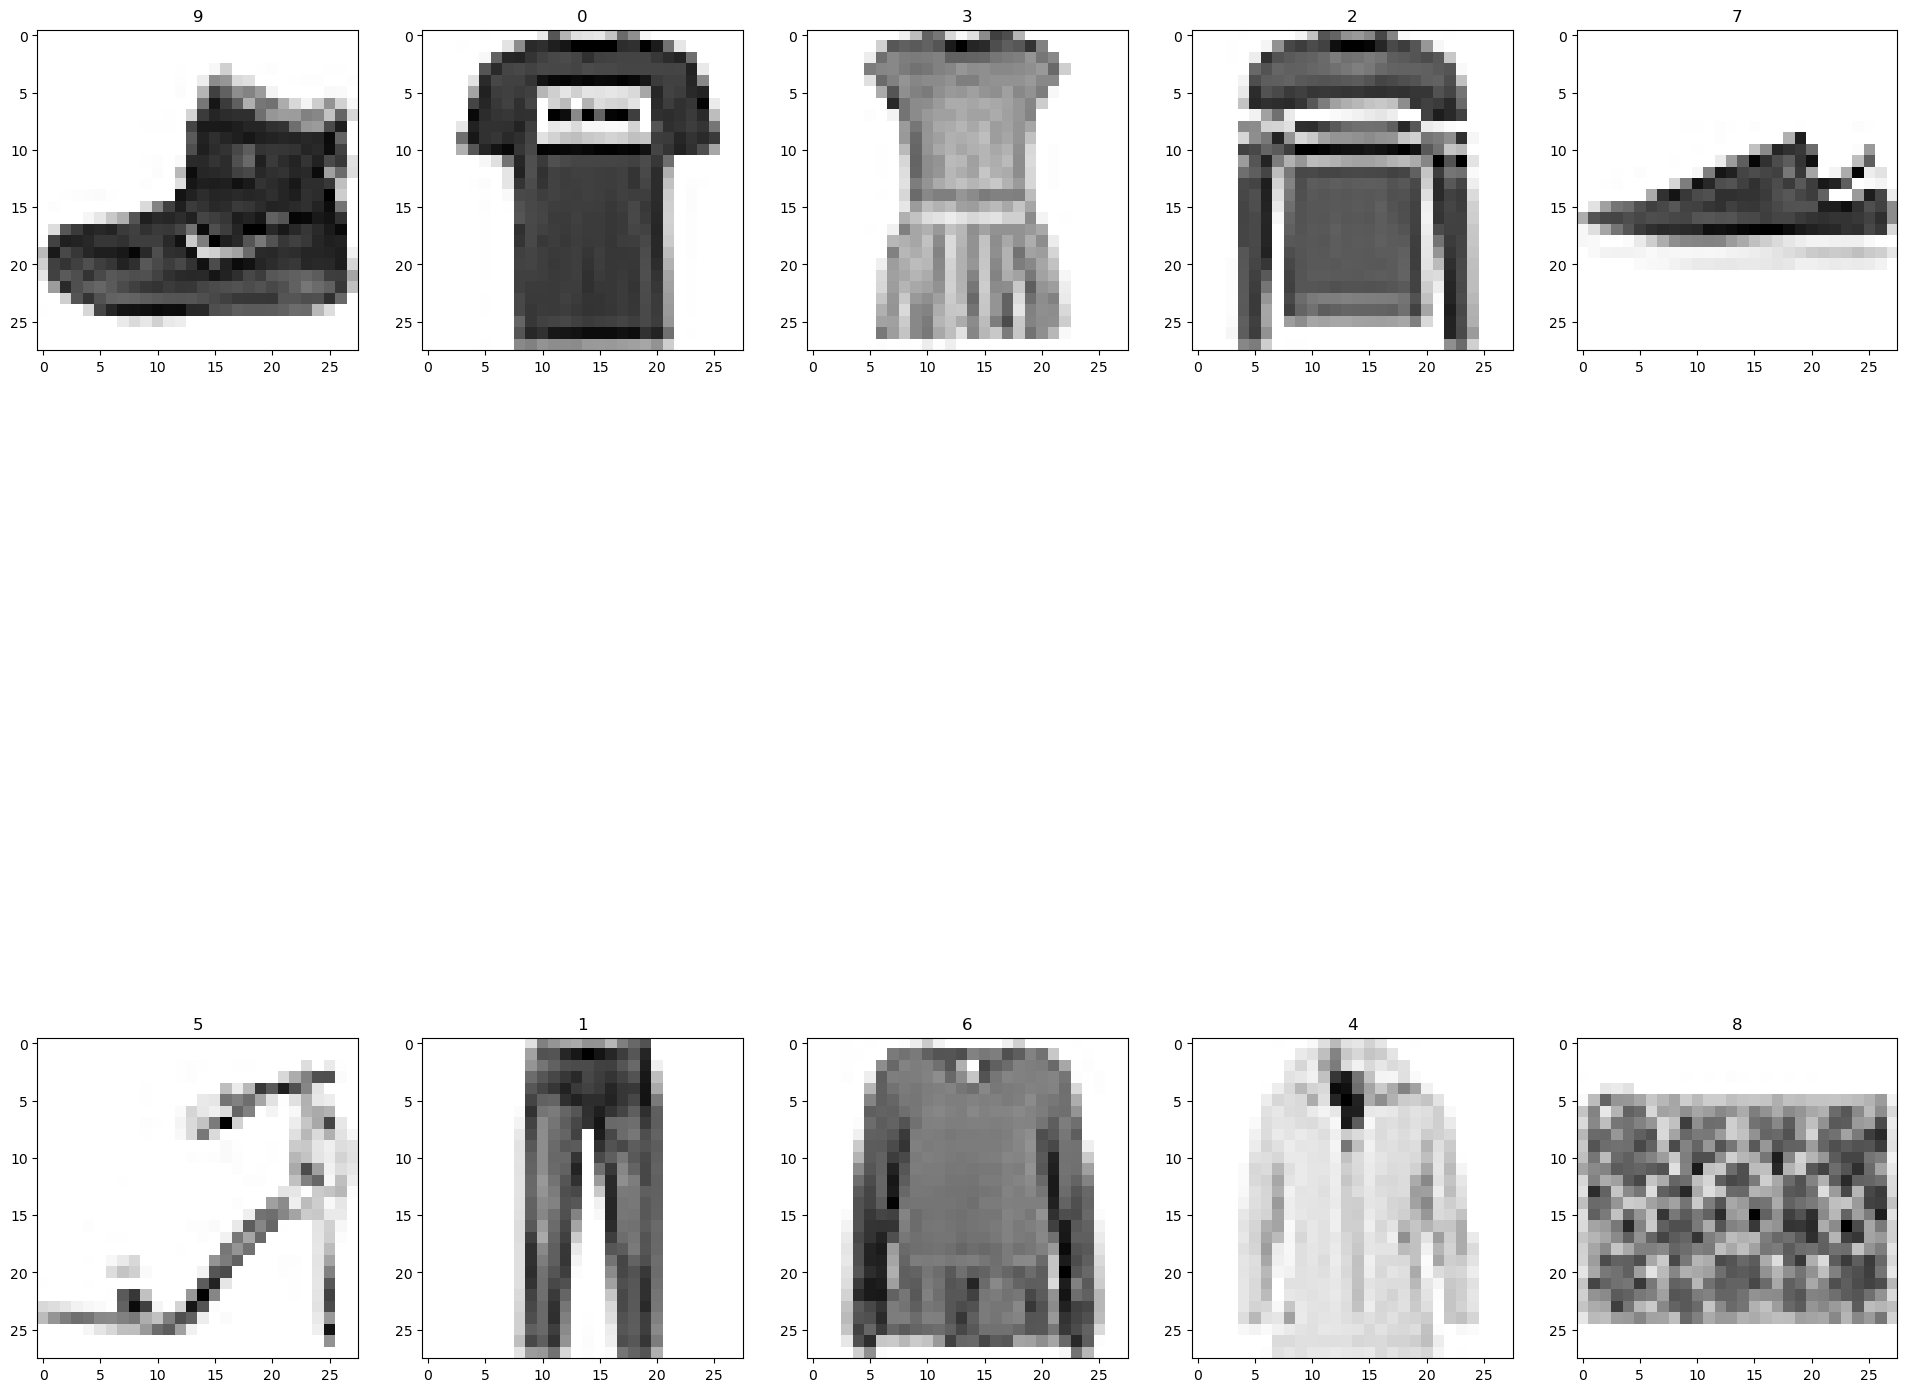

In [14]:
#Reshaping the training data
fashionMNIST = keras.datasets.fashion_mnist
(x_train,y_train),(x_test,y_test) = fashionMNIST.load_data()
x_train =np.expand_dims(x_train,-1)  #transforming the shape of the arrays from (28, 28) to (28, 28, 1)
x_test=np.expand_dims(x_test,-1)
ei1 =np.array(pd.unique(y_train))   # to find unique values in the y_train array
eindex1=[]
print(ei1)
for i in ei1:
    eindex1.append(list(y_train).index(i))
print(eindex1)

plt.figure(figsize=(24,24))
for x,y in enumerate(eindex1):  #For each unique label, it plots an image from the training set (x_train[y]) in a subplot.
    print(x_train[y].shape)
    plt.subplot(2,5, x+1)   # sets up a 2x5 grid of subplots, and x+1 ensures the subplots are indexed starting from 1.
    plt.imshow(tensorflow.squeeze(x_train[y]),cmap='Greys')
    plt.title('{}'.format(ei1[x]))   # used to sets the title of the subplot 
    
    
    #this is the visual representation of a subset of the Fashion MNIST training set, showing one image per class.The images are displayed in a 2x5 grid, and each subplot has a title indicating the class label.

In [15]:
x_train.ndim    #finding the number of dimensions (axes) of an array

4

In [16]:
x_train.shape

(60000, 28, 28, 1)

### Feature scaling
Divides every pixel value in the training and testing set (x_train & x_test)by 255. Since pixel values in typical image data range from 0 to 255 (with 0 being black and 255 being white), dividing by 255 scales the values to be in the range(0,1)

In [17]:
x_train=x_train/255
x_test=x_test/255

In [18]:
x_train

array([[[[0.],
         [0.],
         [0.],
         ...,
         [0.],
         [0.],
         [0.]],

        [[0.],
         [0.],
         [0.],
         ...,
         [0.],
         [0.],
         [0.]],

        [[0.],
         [0.],
         [0.],
         ...,
         [0.],
         [0.],
         [0.]],

        ...,

        [[0.],
         [0.],
         [0.],
         ...,
         [0.],
         [0.],
         [0.]],

        [[0.],
         [0.],
         [0.],
         ...,
         [0.],
         [0.],
         [0.]],

        [[0.],
         [0.],
         [0.],
         ...,
         [0.],
         [0.],
         [0.]]],


       [[[0.],
         [0.],
         [0.],
         ...,
         [0.],
         [0.],
         [0.]],

        [[0.],
         [0.],
         [0.],
         ...,
         [0.],
         [0.],
         [0.]],

        [[0.],
         [0.],
         [0.],
         ...,
         [0.],
         [0.],
         [0.]],

        ...,

        [[0.],
 

In [19]:
x_train[0]

array([[[0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ]],

       [[0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        

### Spliting the dataset for devalidation set

In [20]:
from sklearn.model_selection import train_test_split

# Assuming x_train and y_train are your training data and labels
x_train, x_val, y_train, y_val = train_test_split(x_train, y_train,test_size=0.2, random_state=100)

In [21]:
x_train.shape,y_train.shape

((48000, 28, 28, 1), (48000,))

In [22]:
x_val.shape,y_val.shape

((12000, 28, 28, 1), (12000,))

## Building CNN 

CNN Parameters:

    1. Filters: This parameter specifies the number of filters (or kernels) in the convolutional layer. Each filter 
       learns different features from the input data.
    
    2. kernel_size: This sets the size of the convolutional kernel(filter).
               EX:kernel_size=3 it gives kernal to 3x3
    
    3. Strides: The stride determines the step size the filter takes as it moves across the input.  
               Ex:(2, 2), means the filter moves two pixels at a time).
    
    4. Padding :It involves adding extra pixels (usually zero values) around the border of the input, allowing the
       convolutional filters to process the pixels at the edges of the image.And it is uesd to prevent information loss at 
       the edges during convolution.
    
    5. Activation :Convolutional and fully connected layers to introduce non-linearity, enabling the network to learn 
       complex patterns.Applied to the output of each neuron in a neural network layer(ex:ReLU,Sigmoid,Softmax etc..).
    
    6. input_shape :Used to specify the shape of the input data that will be fed into the neural network.
    
    7. Max pooling :It is to reduce the spatial dimensions of the input feature maps (means capture the most    
       important information while reducing the computational complexity of the network).
        


In [23]:
model = keras.models.Sequential([
    #first Convolutional Layer (Conv2D)
    keras.layers.Conv2D(filters=64, kernel_size=3, strides=(1,1), padding='same', activation='relu', input_shape=(28, 28, 1)),
    keras.layers.MaxPooling2D(pool_size=(2, 2)),
    
    #Second Convolutional Layer (Conv2D)
    keras.layers.Conv2D(filters=128, kernel_size=3, strides=(2,2)),
    
    #third Convolutional Layer (Conv2D)
    keras.layers.Conv2D(filters=64, kernel_size=3, strides=(2,2)),
    
    keras.layers.Flatten(),
    keras.layers.Dense(units=128, activation='relu'),
    keras.layers.Dropout(0.25),
    keras.layers.Dense(units=256, activation='relu'),
    keras.layers.Dropout(0.5),
    keras.layers.Dense(units=256, activation='relu'),
    keras.layers.Dropout(0.25),
    keras.layers.Dense(units=128, activation='relu'),
    keras.layers.Dropout(0.10),
    keras.layers.Dense(units=10, activation='softmax')])

In [24]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 28, 28, 64)        640       
                                                                 
 max_pooling2d (MaxPooling2  (None, 14, 14, 64)        0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 6, 6, 128)         73856     
                                                                 
 conv2d_2 (Conv2D)           (None, 2, 2, 64)          73792     
                                                                 
 flatten (Flatten)           (None, 256)               0         
                                                                 
 dense (Dense)               (None, 128)               32896     
                                                        

#### Compiling the CNN

In [25]:
model.compile(optimizer ='adam',
    loss='sparse_categorical_crossentropy',metrics=['accuracy'])

#### Training the CNN

In [26]:
FS=model.fit(x_train,y_train,epochs=20,batch_size=512,verbose=1)

Epoch 1/20


94/94 [==============================] - 15s 132ms/step - loss: 1.0412 - accuracy: 0.6020
Epoch 2/20
94/94 [==============================] - 17s 176ms/step - loss: 0.5404 - accuracy: 0.8021
Epoch 3/20
94/94 [==============================] - 21s 226ms/step - loss: 0.4518 - accuracy: 0.8375
Epoch 4/20
94/94 [==============================] - 15s 156ms/step - loss: 0.4020 - accuracy: 0.8562
Epoch 5/20
94/94 [==============================] - 14s 147ms/step - loss: 0.3748 - accuracy: 0.8661
Epoch 6/20
94/94 [==============================] - 20s 214ms/step - loss: 0.3499 - accuracy: 0.8749
Epoch 7/20
94/94 [==============================] - 15s 160ms/step - loss: 0.3323 - accuracy: 0.8809
Epoch 8/20
94/94 [==============================] - 13s 143ms/step - loss: 0.3144 - accuracy: 0.8871
Epoch 9/20
94/94 [==============================] - 15s 157ms/step - loss: 0.2999 - accuracy: 0.8913
Epoch 10/20
94/94 [==============================] - 19s 204ms/step - loss: 0.2907 - accu

#### Testing the model

In [27]:
model.predict(np.expand_dims(x_train[0],axis=0)).round(2)
#round is how many decimal points

1/1 [==============================] - 0s 241ms/step


array([[0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.02, 0.  , 0.98]],
      dtype=float32)

In [28]:
np.argmax(model.predict(np.expand_dims(x_test[0],axis=0)).round(2))

1/1 [==============================] - 0s 37ms/step


9

In [29]:
y_test[0]

9

In [30]:
y_pred = model.predict(x_test).round(2)
y_pred

313/313 [==============================] - 2s 5ms/step


array([[0.  , 0.  , 0.  , ..., 0.01, 0.  , 0.99],
       [0.  , 0.  , 1.  , ..., 0.  , 0.  , 0.  ],
       [0.  , 1.  , 0.  , ..., 0.  , 0.  , 0.  ],
       ...,
       [0.  , 0.  , 0.  , ..., 0.  , 1.  , 0.  ],
       [0.  , 1.  , 0.  , ..., 0.  , 0.  , 0.  ],
       [0.  , 0.  , 0.  , ..., 0.  , 0.  , 0.  ]], dtype=float32)

In [31]:
evaluation_result=model.evaluate(x_test,y_test)

313/313 [==============================] - 2s 7ms/step - loss: 0.2960 - accuracy: 0.9021


In [32]:
# Print the evaluation results
print("Loss:", evaluation_result[0])
print("Accuracy:", evaluation_result[1])

Loss: 0.29598891735076904
Accuracy: 0.9021000266075134


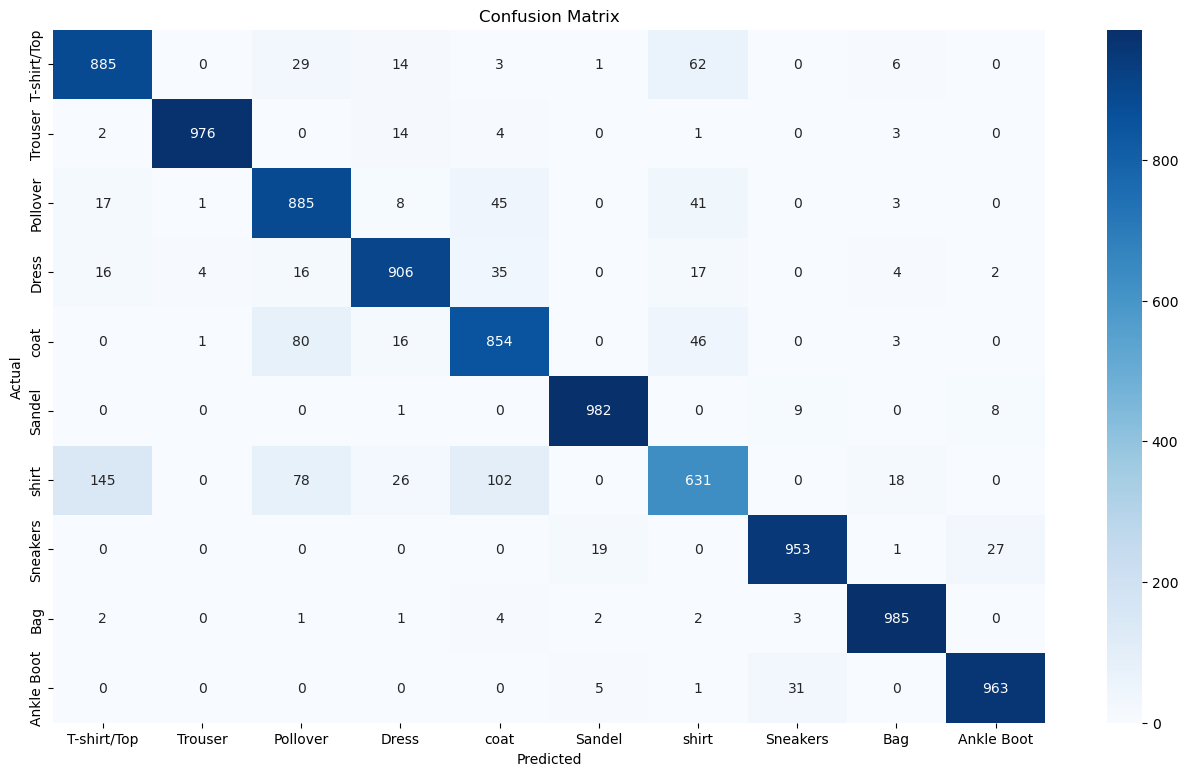

In [33]:
plt.figure(figsize=(16, 9))

#Convert predicted probabilities to class labels (argmax)
from sklearn.metrics import confusion_matrix
y_pred_labels = [np.argmax(label) for label in y_pred]
cm = confusion_matrix(y_test, y_pred_labels)

# Creating a heatmap using seaborn
sns.heatmap(cm, annot=True, fmt='g',cmap='Blues', xticklabels=class_labels, yticklabels=class_labels)

plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

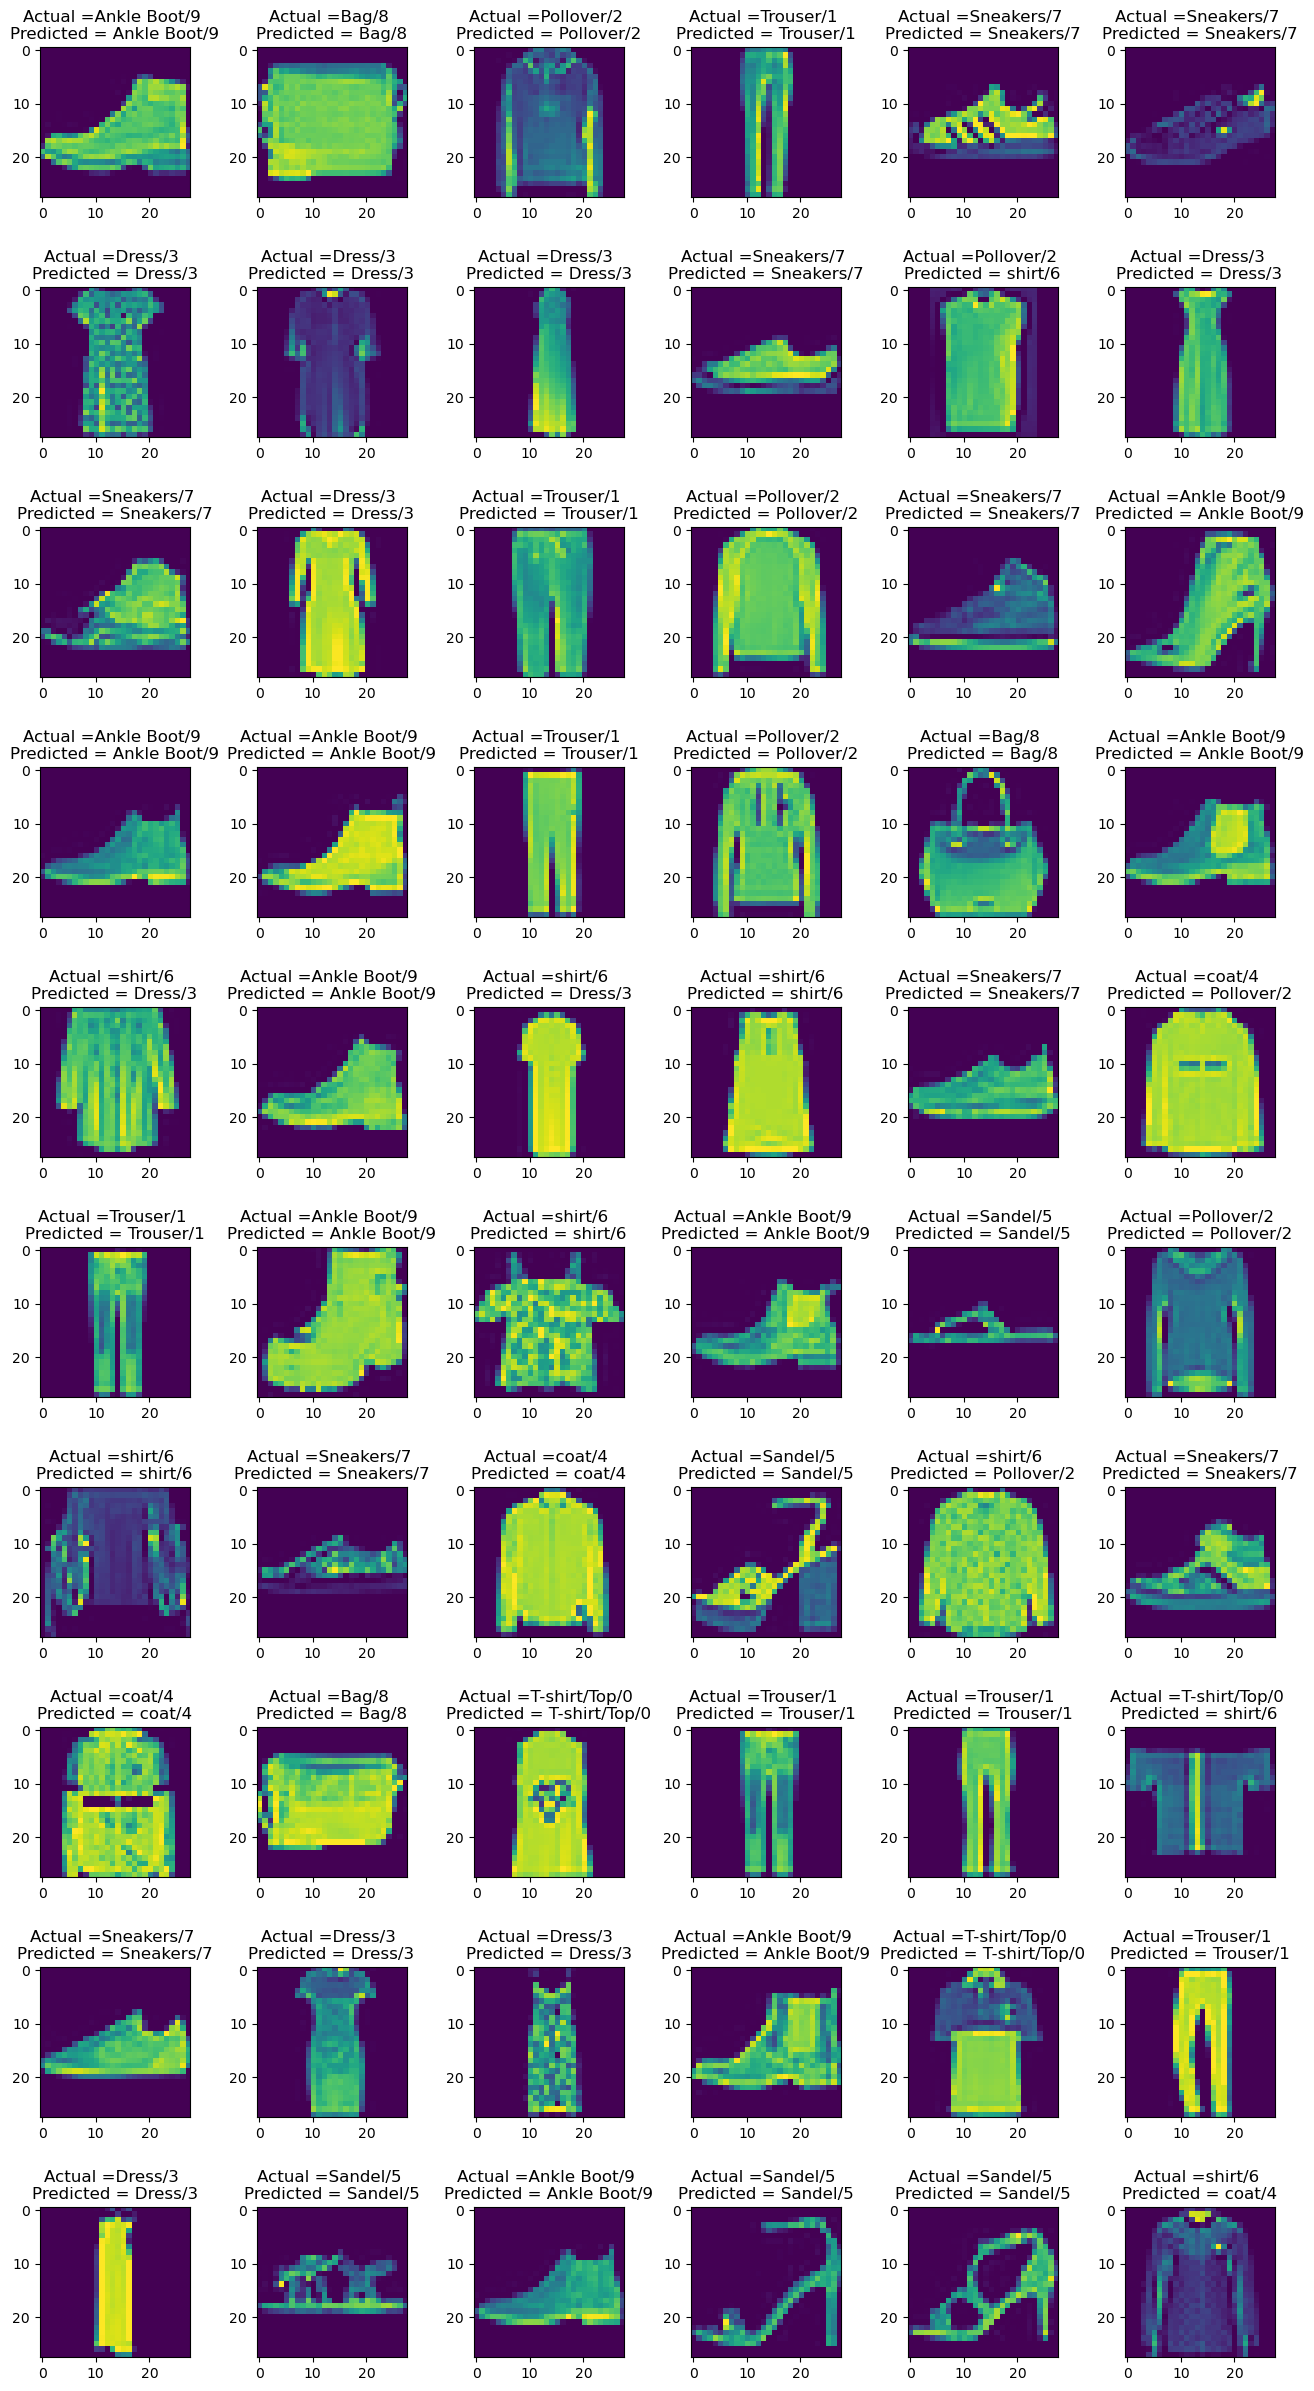

In [34]:
#checking the actual and predicted
plt.figure(figsize =(16,30))
j=1

for i in np.random.randint(0,1000,60):
    plt.subplot(10,6,j); j+=1
    plt.imshow(x_test[i].reshape(28,28))#cmap='Greys')
    plt.title('Actual ={}/{} \nPredicted = {}/{}'.format(class_labels[y_test[i]],y_test[i],
                     class_labels[np.argmax(y_pred[i])],np.argmax(y_pred[i])))
    
    
plt.subplots_adjust(wspace=0.4, hspace=0.6)  # Adjust the values as needed

plt.show()